<center>
<h1 style="font-size: 36px;">NBA Line Up Analysis</h1>
</center>

[GitHub Repo](https://github.com/BrianMillerS/TOOL1_FINAL_PROJECT)  
Data Science Tools 1 Final Project  
Group Members: Brian Hanson, Brian Miller  
March 9th, 2023

## Dataset and Motivation: (1 point)
****(1pt) How/why the dataset was collected and a description of the metadata of your dataset?****  

We will be working in the feild of NBA sports analytics. For the NBA, there is no shortage of data available. To answer our research questions we pulled data from two different sources:  
 - Player statistics data (age, salary, height, weight, as well as performance summary statistics from prior seasons)  
 - NBA game play-by-play data (which has in-game event events recorded down to the second)  
  
We obtained the player statistics from [www.basketball-reference.com](https://www.basketball-reference.com/). Here is an example, [Kevin Durant (id = duranke01)](https://www.basketball-reference.com/players/d/duranke01.html)  
  
We obtained the play-by-play data from a [Kaggle dataset of play-by-play data for each season](https://www.kaggle.com/datasets/schmadam97/nba-playbyplay-data-20182019?resource=download), which was obtained in turn by scraping basketball-reference. 
  



## Research Question: (2 points)
***(2pts) What real-world problem are you trying to solve? What are the input and output of your analysis?***  
  
Main Question: What are the specific NBA player lineups (set of 5 players) that perform the best?  
  
Other Interesting Questions:  
 - Are there player metrics (age, salary, height, weight) that correlate with a high performing lineup?


## Literature Review: (2 points)  
***(2pts) What other work has been done in this area, and how is your work novel compared to others?***  

## Quality of Cleaning: (6points)  
***(2pts) Data cleaning and type conversion activity.  Please share anything unusual you faced during this activity.***  
***(2pts) What did you do about missing values and why? Handling missing values properly is very important.***  
***(2pts) New feature/attribute creation and data summary statistics and interpretation.***

## Vizualization (8 points, 2 each)  
***(2pts) Data visualization activity (box plot, bar plot, violin plot, and pairplot to see relationships and distribution, etc.).***  
***(2pts) Describe anything you find in the data after each visualization.***  
***(2pts) What data visualization helped you understand about data distribution.***  
***(2pts) What you did about possible outlier as per data distribution visualization. (Did you confirm with your client whether it is actually an outlier or put a disclosure statement in your notebook if you decided to remove it?)***  
  
Overview of Vizualization And Analysis Performed:  
 - Summary statistics (n games, unique players, unique 5-player lineups)
 - Vizualize distributions (pts scored, total posession per lineup, pts scored per possession for each lineup)
 - Outlier handling
 - Heatmap of lineup statistics
 - Heatmap of player performance
 - Linear model of to explore variables that influence the performance of a given lineup

In [1]:
## Dependencies ##

# load custom functions from our support py files
from play_by_play import load_specific_games, get_lineup_feature, load_seasons, get_lineup_results

# load general dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
## LOAD DATA, The whole 2016 NBA data play-by-play ##
# df_2016 = load_seasons(seasons=[16], lineups=True, possessions=True, drop_lineup_miscount_games=True)[0]

# df_2016.to_csv('df_2016.csv', index=False)

df_2016 = pd.read_csv('df_2016.csv')


In [3]:


df_2016_lineups_featues_mean = get_lineup_results(df_2016, return_lineup_matchups=False)
for stat_i in ['Height_cm', 'Mass_kg', 'age', 'salary']:
    df_2016_lineups_featues_mean = get_lineup_feature(df_2016_lineups_featues_mean, 
                                                      table_name='info', 
                                                      col_name= stat_i, seasons_ago=1, 
                                                      agg='mean', 
                                                      delta_AwayHome=False)
df_2016_lineups_featues_mean["PtsDiff"] = df_2016_lineups_featues_mean["PtsScored"] - df_2016_lineups_featues_mean["PtsAllowed"]
df_2016_lineups_featues_mean["PtsDiff_perPos"] = df_2016_lineups_featues_mean["PtsDiff"] / df_2016_lineups_featues_mean["TotalPossessions"]



df_2016_lineups_featues_list = get_lineup_results(df_2016, return_lineup_matchups=False)
for stat_i in ['Height_cm', 'Mass_kg', 'age', 'salary']:
    df_2016_lineups_featues_list = get_lineup_feature(df_2016_lineups_featues_list, 
                                                      table_name='info', 
                                                      col_name= stat_i, seasons_ago=1, 
                                                      agg='list', 
                                                      delta_AwayHome=False)
df_2016_lineups_featues_list["PtsDiff"] = df_2016_lineups_featues_list["PtsScored"] - df_2016_lineups_featues_list["PtsAllowed"]
df_2016_lineups_featues_list["PtsDiff_perPos"] = df_2016_lineups_featues_list["PtsDiff"] / df_2016_lineups_featues_list["TotalPossessions"]

# # col_name ['Height_cm', 'Mass_kg', 'age', 'salary']
# # agg ['list', 'mean', 'median', 'min', 'max', 'range', 'std']


Loading dienggo01... Loading horfoal01... Loading harrijo01... Loading applike01... Loading pendeje02... Loading fryech01... Loading turnemy01... Loading wrighdo01... Loading muscami01... Loading stephla01... Loading hilljo01... Loading wiggian01... Loading antetth01... Loading turneev01... Loading jeffeco01... Loading ginobma01... Loading holidju01... Loading jordade01... Loading pricero01... Loading koufoko01... Loading connapa01... Loading anthojo01... Loading landrca01... Loading speigma01... Loading greenja01... Loading splitti01... Loading wilcocj01... Loading montelu01... Loading haywago01... Loading milescj01... Loading nichoan01... Loading jonesja02... Loading chalmma01... Loading anderry01... Loading hamiljo02... Loading bayleje01... Loading anderch01... Loading crowdja01... Loading noelne01... Loading gibsota01... Loading bargnan01... Loading dragigo01... Loading johnsty01... Loading randlju01... Loading humphkr01... Loading mirotni01... Loading lopezbr01... Loading paynead0

/var/folders/8c/kzx234q16zdf6dwkcnk692x80000gn/T/ipykernel_30966/3362626149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_df['Home'] = pd.to_numeric(df_2016_lineups_featues_mean['Home'])


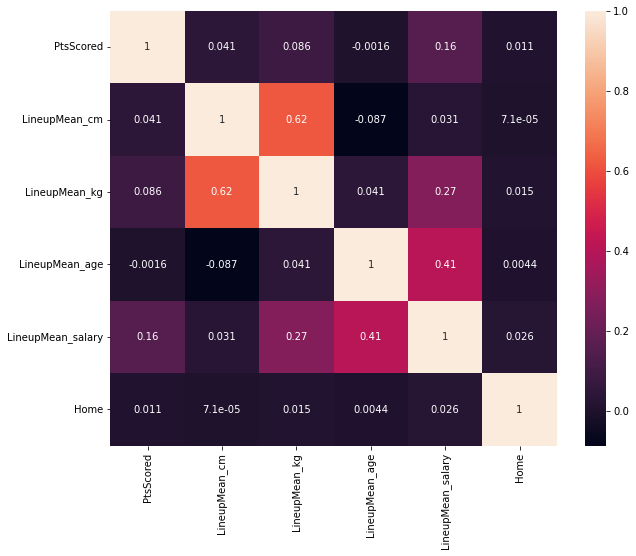

In [18]:

heatmap_df = df_2016_lineups_featues_mean[['PtsScored','LineupMean_cm', 'LineupMean_kg', 'LineupMean_age', 'LineupMean_salary']]
heatmap_df['Home'] = pd.to_numeric(df_2016_lineups_featues_mean['Home'])
plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_df.corr(), annot=True)
plt
plt.show()


In [ ]:
# df_2016_matchups = get_lineup_results(df_2016, return_lineup_matchups=True)




In [ ]:
# drop lineups that had no play time, or no possessions
df_2016_lineups = df_2016_lineups[df_2016_lineups['SecElapsed'] != 0]
df_2016_lineups = df_2016_lineups[df_2016_lineups['TotalPossessions'] != 0]

# calculate the point differential (home-away)
df_2016_lineups['Pts_diff'] = df_2016_lineups['HomePts']-df_2016_lineups['AwayPts']
df_2016_lineups['Pts_diff_perPos'] = df_2016_lineups['Pts_diff']/df_2016_lineups['TotalPossessions']
df_2016_lineups['Pts_diff_perSec'] = df_2016_lineups['Pts_diff']/df_2016_lineups['SecElapsed']

# check for missing values
print(df_2016_lineups.info())


In [ ]:
## Vizualize Basic Distributions ##

# create a histogram of SecElapsed
plt.hist(df_2016_lineups['SecElapsed'], bins=50)
plt.xlabel("Seconds Elapsed")
plt.ylabel("Frequency")
plt.title("Distribution of Seconds Elapsed")
plt.show()

# create a histogram of TotPossessions
plt.hist(df_2016_lineups['TotalPossessions'], bins=50)
plt.xlabel("Total Possessions")
plt.ylabel("Frequency")
plt.title("Distribution of Total Possessions")
plt.show()

# create a histogram of TotPossessions
plt.hist(df_2016_lineups['Pts_diff'], bins=50)
plt.xlabel("Total Point Differential")
plt.ylabel("Frequency")
plt.title("Distribution of Point Differentials")
plt.show()

# create a histogram of TotPossessions
plt.hist(df_2016_lineups['Pts_diff_perPos'], bins=30)
plt.xlabel("Total Point Differential per Pos")
plt.ylabel("Frequency")
plt.title("Distribution of Point Differentials per Pos")
plt.show()

# create a histogram of TotPossessions
plt.hist(df_2016_lineups['Pts_diff_perSec'], bins=80)
plt.xlabel("Total Point Differential per Sec played")
plt.ylabel("Frequency")
plt.title("Distribution of Point Differentials per Sec played")
plt.show()

In [ ]:
# isolate the top performing 10% of matchups
quantile_95 = df_2016_lineups['Pts_diff_perPos'].quantile(0.5)

# select the rows with Pts_diff_perPos above the 90th percentile
top_10_percent_pos = df_2016_lineups[df_2016_lineups['Pts_diff_perPos'] >= quantile_90]

# find the 10th percentile of Pts_diff_perPos
quantile_05 = df_2016_lineups['Pts_diff_perPos'].quantile(0.05)

# select the rows with Pts_diff_perPos below the 10th percentile and with negative values
top_10_percent_neg = df_2016_lineups[(df_2016_lineups['Pts_diff_perPos'] <= quantile_10) & (df_2016_lineups['Pts_diff_perPos'] < 0)]



In [ ]:
sns.violinplot()